In [115]:
!pip install graphviz
!pip install xgboost

In [124]:
import pandas as pd
import numpy as np


# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# Data transformation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler


# Features Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

# Classificators
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
from sklearn.metrics import confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.tree import export_text
from sklearn.tree import export_graphviz
import graphviz

import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [125]:
BANK_DATA = pd.read_csv('Data/Final_Data.csv')
BANK_DATA.shape

(41188, 15)

In [126]:
df = BANK_DATA.copy()
df.shape

(41188, 15)

In [127]:
df.head()

,marital,education,default,contact,month,day_of_week,poutcome,age,duration,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,1.0,0.0,0.0,1.0,6.0,1.0,1.0,0.481481,0.053070,0.0,1.0,0.9375,0.698753,0.60251,0
1,1.0,3.0,1.0,1.0,6.0,1.0,1.0,0.493827,0.030297,0.0,1.0,0.9375,0.698753,0.60251,0
2,1.0,3.0,0.0,1.0,6.0,1.0,1.0,0.246914,0.045954,0.0,1.0,0.9375,0.698753,0.60251,0
3,1.0,1.0,0.0,1.0,6.0,1.0,1.0,0.283951,0.030704,0.0,1.0,0.9375,0.698753,0.60251,0
4,1.0,3.0,0.0,1.0,6.0,1.0,1.0,0.481481,0.062424,0.0,1.0,0.9375,0.698753,0.60251,0


# Train-Test Split

In [128]:
X = df.drop('y', axis=1)
y = df['y']
X.shape, y.shape

((41188, 14), (41188,))

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (30891, 14)
X_test: (10297, 14)
y_train: (30891,)
y_test: (10297,)


# Model Training

## Logistic Regression

* **penalty:** This specifies type of regularization used in logistic regression. It can be set to 'l1', 'l2', 'elasticnet', or 'none'. 'l1' and 'l2' refer to L1 (Lasso) and L2 (Ridge) regularization, respectively. 'elasticnet' allows a combination of L1 and L2 regularization. 'none' means no regularization.
* **C:** This is the inverse of the regularization strength. A smaller value of C implies stronger regularization.You may need to tune this parameter to find the right balance between fitting the data and preventing overfitting.
* **solver:** The solver algorithm used to optimize the logistic regression. Common options are 'lbfgs', 'liblinear', 'sag', 'saga', and 'newton-cg'. The choice of solver can affect the performance and speed of convergence.
* **max_iter:** The maximum number of iterations for the solver to converge. You may need to adjust this if the solver is not converging or converging too slowly.

In [20]:
lr = LogisticRegression()

In [21]:
params_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-3, 3, 100),
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg'],
    'max_iter': np.arange(100, 1000, 100),
}

In [22]:
lr_random = RandomizedSearchCV(estimator = lr, param_distributions = params_lr,
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

lr_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END C=187.3817422860383, max_iter=700, penalty=none, solver=lbfgs; total time=   0.3s
[CV] END C=187.3817422860383, max_iter=700, penalty=none, solver=lbfgs; total time=   0.3s
[CV] END C=187.3817422860383, max_iter=700, penalty=none, solver=lbfgs; total time=   0.3s
[CV] END C=187.3817422860383, max_iter=700, penalty=none, solver=lbfgs; total time=   0.3s
[CV] END C=187.3817422860383, max_iter=700, penalty=none, solver=lbfgs; total time=   0.3s
[CV] END C=0.001747528400007683, max_iter=800, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.001747528400007683, max_iter=800, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.001747528400007683, max_iter=800, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.001747528400007683, max_iter=800, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.001747528400007683, max_iter=800, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.057223676

[CV] END C=756.463327554629, max_iter=600, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=756.463327554629, max_iter=600, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=756.463327554629, max_iter=600, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=756.463327554629, max_iter=600, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=756.463327554629, max_iter=600, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.13219411484660287, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.13219411484660287, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.13219411484660287, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.13219411484660287, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.13219411484660287, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.8111308307896873, max_iter=200, penalty=l2, solver=liblinear; total

[CV] END C=187.3817422860383, max_iter=700, penalty=l2, solver=sag; total time=   0.3s
[CV] END C=187.3817422860383, max_iter=700, penalty=l2, solver=sag; total time=   0.3s
[CV] END C=187.3817422860383, max_iter=700, penalty=l2, solver=sag; total time=   0.3s
[CV] END C=187.3817422860383, max_iter=700, penalty=l2, solver=sag; total time=   0.3s
[CV] END C=187.3817422860383, max_iter=700, penalty=l2, solver=sag; total time=   0.3s
[CV] END C=572.236765935022, max_iter=300, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=572.236765935022, max_iter=300, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=572.236765935022, max_iter=300, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=572.236765935022, max_iter=300, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=572.236765935022, max_iter=300, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=11.497569953977356, max_iter=800, penalty=l2, solver=liblinear; total time=   0.1s
[

[CV] END C=0.001, max_iter=900, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.024770763559917114, max_iter=800, penalty=none, solver=sag; total time=   0.3s
[CV] END C=0.024770763559917114, max_iter=800, penalty=none, solver=sag; total time=   0.3s
[CV] END C=0.024770763559917114, max_iter=800, penalty=none, solver=sag; total time=   0.2s
[CV] END C=0.024770763559917114, max_iter=800, penalty=none, solver=sag; total time=   0.3s
[CV] END C=0.024770763559917114, max_iter=800, penalty=none, solver=sag; total time=   0.3s
[CV] END C=0.002009233002565048, max_iter=500, penalty=none, solver=lbfgs; total time=   0.2s
[CV] END C=0.002009233002565048, max_iter=500, penalty=none, solver=lbfgs; total time=   0.3s
[CV] END C=0.002009233002565048, max_iter=500, penalty=none, solver=lbfgs; total time=   0.2s
[CV] END C=0.002009233002565048, max_iter=500, penalty=none, solver=lbfgs; total time=   0.3s
[CV] END C=0.002009233002565048, max_iter=500, penalty=none, solver=lbfgs; total ti

[CV] END C=0.004641588833612782, max_iter=300, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=0.004641588833612782, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.007054802310718645, max_iter=900, penalty=none, solver=lbfgs; total time=   0.3s
[CV] END C=0.007054802310718645, max_iter=900, penalty=none, solver=lbfgs; total time=   0.3s
[CV] END C=0.007054802310718645, max_iter=900, penalty=none, solver=lbfgs; total time=   0.2s
[CV] END C=0.007054802310718645, max_iter=900, penalty=none, solver=lbfgs; total time=   0.3s
[CV] END C=0.007054802310718645, max_iter=900, penalty=none, solver=lbfgs; total time=   0.3s
[CV] END C=141.74741629268047, max_iter=700, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=141.74741629268047, max_iter=700, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=141.74741629268047, max_iter=700, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=141.74741629268047, max_iter=700, penalty=l1, solver=sag; total time=   0.0

[CV] END C=107.22672220103232, max_iter=100, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=107.22672220103232, max_iter=100, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=107.22672220103232, max_iter=100, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=107.22672220103232, max_iter=100, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=107.22672220103232, max_iter=100, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=0.5336699231206312, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.5336699231206312, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.5336699231206312, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.5336699231206312, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.5336699231206312, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=40.37017258596558, max_iter=500, penalty=elasticnet, s

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=1,
                   param_distributions={'C': array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.3...
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03]),
                                        'max_iter': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['lbfgs', 'liblinear', 'sag',
                                                   'saga', 'newton-cg']},
                   random_state=42, verbose=2)

In [23]:
print(lr_random.best_params_)
print('score: {}' .format(lr_random.best_score_))

{'solver': 'lbfgs', 'penalty': 'none', 'max_iter': 700, 'C': 187.3817422860383}
score: 0.9098765851880536


* Best Parameters
    * solver: lbfgs
    * penalty: none
    * max_iter: 700
    * C: 187.3817422860383
* **Accuracy: 90.98%**

In [38]:
lr = LogisticRegression(solver='lbfgs',
                          penalty='none',
                          max_iter=700,
                          C=187.3817422860383)

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

LR_Score = cross_val_score(lr,X_test,y_test,cv=10)
print('Cross Val Score: ', LR_Score.mean())

LR_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', LR_RMSE)

Cross Val Score:  0.911917499315954
Root Mean Squared Error: 0.2953131675891532


In [35]:
lr_conf_matrix = confusion_matrix(y_test, y_pred)
lr_conf_matrix

array([[8891,  241],
       [ 657,  508]])

In [37]:
lr_accuracy = (lr_conf_matrix[1,1] + lr_conf_matrix[0,0]) / (lr_conf_matrix[1,1] + lr_conf_matrix[0,0] + lr_conf_matrix[0,1] + lr_conf_matrix[1,0])
lr_precision = lr_conf_matrix[1,1] / (lr_conf_matrix[1,1] + lr_conf_matrix[0,1])
lr_recall = lr_conf_matrix[1,1] / (lr_conf_matrix[1,1] + lr_conf_matrix[1,0])
lr_f1_score = 2 * (lr_precision * lr_recall) / (lr_precision + lr_recall)

print("Accuracy: {:.1f}".format(lr_accuracy*100))
print("Precision: {:.1f}".format(lr_precision*100))
print("Recall: {:.1f}".format(lr_recall*100))
print("F1 Score: {:.1f}".format(lr_f1_score*100))

Accuracy: 91.3
Precision: 67.8
Recall: 43.6
F1 Score: 53.1


## KNN

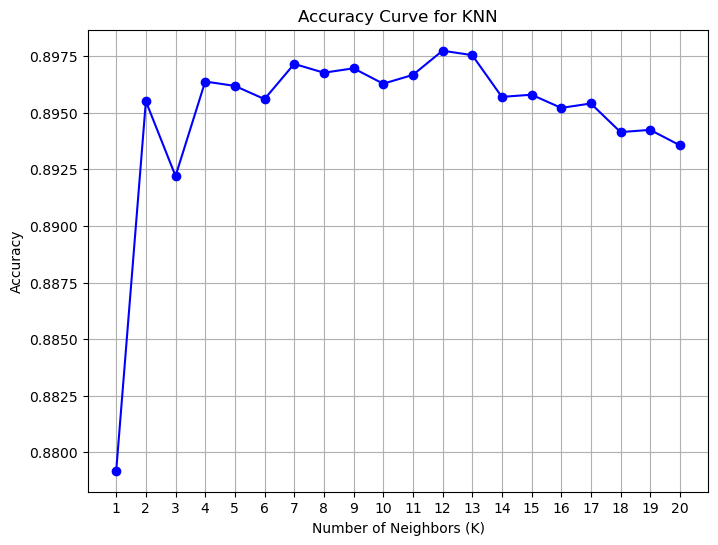

In [96]:
k_values = list(range(1, 21))  
accuracy_values = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = knn.score(X_test, y_test)  
    accuracy_values.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-', color='b')
plt.title('Accuracy Curve for KNN')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [72]:
k = 12

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

knn_Score = cross_val_score(knn,X_test,y_test,cv=10)
print('Cross Val Score: ', knn_Score.mean())

knn_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', knn_RMSE)

Cross Val Score:  0.8896764697557247
Root Mean Squared Error: 0.3197855453094022


In [73]:
knn_conf_matrix = confusion_matrix(y_test, y_pred)
knn_conf_matrix

array([[9019,  113],
       [ 940,  225]])

In [74]:
knn_accuracy = (knn_conf_matrix[1,1] + knn_conf_matrix[0,0]) / (knn_conf_matrix[1,1] + knn_conf_matrix[0,0] + knn_conf_matrix[0,1] + knn_conf_matrix[1,0])
knn_precision = knn_conf_matrix[1,1] / (knn_conf_matrix[1,1] + knn_conf_matrix[0,1])
knn_recall = knn_conf_matrix[1,1] / (knn_conf_matrix[1,1] + knn_conf_matrix[1,0])
knn_f1_score = 2 * (knn_precision * knn_recall) / (knn_precision + knn_recall)

print("Accuracy: {:.1f}".format(knn_accuracy*100))
print("Precision: {:.1f}".format(knn_precision*100))
print("Recall: {:.1f}".format(knn_recall*100))
print("F1 Score: {:.1f}".format(knn_f1_score*100))

Accuracy: 89.8
Precision: 66.6
Recall: 19.3
F1 Score: 29.9


## SVM











* **Kernel**: SVM can use different types of kernels to transform the feature space. Common kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid. Choosing the right kernel can significantly impact the model's performance.

* **C (Regularization Parameter)**: The C parameter controls the trade-off between maximizing the margin and minimizing the classification error. A small C value results in a wider margin but may allow some misclassifications, while a large C value reduces the margin but enforces stricter classification.

* **Gamma**: Gamma is a hyperparameter used in the RBF kernel. It determines the shape of the decision boundary. Smaller gamma values lead to a smoother boundary, while larger gamma values result in a more complex and potentially overfit boundary.

In [86]:
svc = SVC()

In [89]:
params_svc = {
    'kernel': ['sigmoid', 'rbf', 'linear'], 
}

In [90]:
svc_random = RandomizedSearchCV(estimator = svc, param_distributions = params_svc,
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)
svc_random.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .....................................kernel=sigmoid; total time=   4.6s
[CV] END .....................................kernel=sigmoid; total time=   4.9s
[CV] END .....................................kernel=sigmoid; total time=   4.5s
[CV] END .....................................kernel=sigmoid; total time=   4.9s
[CV] END .....................................kernel=sigmoid; total time=   5.1s
[CV] END .........................................kernel=rbf; total time=   5.8s
[CV] END .........................................kernel=rbf; total time=   5.8s
[CV] END .........................................kernel=rbf; total time=   5.9s
[CV] END .........................................kernel=rbf; total time=   5.8s
[CV] END .........................................kernel=rbf; total time=   5.9s
[CV] END ......................................kernel=linear; total time=   6.1s
[CV] END ......................................ke

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100, n_jobs=1,
                   param_distributions={'kernel': ['sigmoid', 'rbf', 'linear']},
                   random_state=42, verbose=2)

In [91]:
print(svc_random.best_params_)
print('score: {}' .format(svc_random.best_score_))

{'kernel': 'linear'}
score: 0.899614835931455


* Best Parameters
    * kernel: linear
* **Accuracy: 89.96%**

In [130]:
svc = SVC(kernel='linear')

svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

svc_Score = cross_val_score(svc,X_test,y_test,cv=10)
print('Cross Val Score: ', svc_Score.mean())

svc_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', svc_RMSE)

Cross Val Score:  0.8978348287997585
Root Mean Squared Error: 0.3168873575238588


In [131]:
svc_conf_matrix = confusion_matrix(y_test, y_pred)
svc_conf_matrix

array([[8959,  173],
       [ 861,  304]])

In [132]:
svc_accuracy = (svc_conf_matrix[1,1] + svc_conf_matrix[0,0]) / (svc_conf_matrix[1,1] + svc_conf_matrix[0,0] + svc_conf_matrix[0,1] + svc_conf_matrix[1,0])
svc_precision = svc_conf_matrix[1,1] / (svc_conf_matrix[1,1] + svc_conf_matrix[0,1])
svc_recall = svc_conf_matrix[1,1] / (svc_conf_matrix[1,1] + svc_conf_matrix[1,0])
svc_f1_score = 2 * (svc_precision * svc_recall) / (svc_precision + svc_recall)

print("Accuracy: {:.1f}".format(svc_accuracy*100))
print("Precision: {:.1f}".format(svc_precision*100))
print("Recall: {:.1f}".format(svc_recall*100))
print("F1 Score: {:.1f}".format(svc_f1_score*100))

Accuracy: 90.0
Precision: 63.7
Recall: 26.1
F1 Score: 37.0


## Naive Bayes

In [139]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

NB_Score = cross_val_score(nb,X_test,y_test,cv=10)
print('Cross Val Score: ', NB_Score.mean())

NB_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', NB_RMSE)

Cross Val Score:  0.8868603696679781
Root Mean Squared Error: 0.3363625268093712


In [140]:
nb_conf_matrix = confusion_matrix(y_test, y_pred)
nb_conf_matrix

array([[9132,    0],
       [1165,    0]])

In [141]:
nb_accuracy = (nb_conf_matrix[1,1] + nb_conf_matrix[0,0]) / (nb_conf_matrix[1,1] + nb_conf_matrix[0,0] + nb_conf_matrix[0,1] + nb_conf_matrix[1,0])
nb_precision = nb_conf_matrix[1,1] / (nb_conf_matrix[1,1] + nb_conf_matrix[0,1])
nb_recall = nb_conf_matrix[1,1] / (nb_conf_matrix[1,1] + nb_conf_matrix[1,0])
nb_f1_score = 2 * (nb_precision * nb_recall) / (nb_precision + nb_recall)

print("Accuracy: {:.1f}".format(nb_accuracy*100))
print("Precision: {:.1f}".format(nb_precision*100))
print("Recall: {:.1f}".format(nb_recall*100))
print("F1 Score: {:.1f}".format(nb_f1_score*100))

Accuracy: 88.7
Precision: nan
Recall: 0.0
F1 Score: nan


## Decision Tree

In [24]:
DTC = DecisionTreeClassifier()

* **criterion:** This hyperparameter specifies the function used to measure the quality of a split. It can be set to 'gini' for the Gini impurity or 'entropy' for information gain.
* **splitter:** It determines the strategy used to split at each node. You can set it to 'best' to choose the best split, or 'random' to choose the best random split.
* **max_depth:** The maximum depth of the tree. A deeper tree can model the training data better but may lead to overfitting. You can set this to an integer or 'None' to let the tree grow until it contains fewer than min_samples_split samples.
* **min_samples_split:** This is the minimum number of samples required to split an internal node. Increasing it can prevent overfitting.
* **min_samples_leaf:** It's the minimum number of samples required to be at a leaf node. Like min_samples_split, this hyperparameter helps control overfitting.
* **max_features:** It determines the maximum number of features considered for splitting at each node. You can set it to 'auto' (sqrt of the total features), 'sqrt' (sqrt of the total features), 'log2' (log2 of the total features), an integer, or 'None'.
* **max_leaf_nodes:** It limits the number of leaf nodes in the tree. This can be used to control the size of the tree.

In [25]:
DTC_param = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None] + list(np.arange(1, 21)),
    'min_samples_split': list(np.arange(2, 21)),
    'min_samples_leaf': list(np.arange(1, 21)),
    'max_features': ['auto', 'sqrt', 'log2', None] + list(np.arange(1, X.shape[1] + 1)),
    'max_leaf_nodes': [None] + list(np.arange(2, 21)),
}


In [26]:
DTC_random = RandomizedSearchCV(estimator = DTC, param_distributions = DTC_param,
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)
DTC_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END criterion=entropy, max_depth=2, max_features=5, max_leaf_nodes=12, min_samples_leaf=17, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=5, max_leaf_nodes=12, min_samples_leaf=17, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=5, max_leaf_nodes=12, min_samples_leaf=17, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=5, max_leaf_nodes=12, min_samples_leaf=17, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=5, max_leaf_nodes=12, min_samples_leaf=17, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=13, max_leaf_nodes=20, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=e

[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=18, max_features=None, max_leaf_nodes=15, min_samples_leaf=13, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=18, max_features=None, max_leaf_nodes=15

[CV] END criterion=gini, max_depth=20, max_features=14, max_leaf_nodes=17, min_samples_leaf=14, min_samples_split=8, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=14, max_leaf_nodes=17, min_samples_leaf=14, min_samples_split=8, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=14, max_leaf_nodes=17, min_samples_leaf=14, min_samples_split=8, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=14, max_leaf_nodes=17, min_samples_leaf=14, min_samples_split=8, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, max_features=13, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, max_features=13, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, max_features=13, max_leaf_nodes=4, min_samples_l

[CV] END criterion=gini, max_depth=8, max_features=12, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=20, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=12, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=20, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=12, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=20, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=12, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=20, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=12, max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=20, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, max_features=7, max_leaf_nodes=13, min_samples_leaf=13, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, max_features=7, max_leaf_nodes=13, min_samples_leaf=13,

[CV] END criterion=gini, max_depth=5, max_features=3, max_leaf_nodes=9, min_samples_leaf=11, min_samples_split=16, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=1, max_leaf_nodes=10, min_samples_leaf=14, min_samples_split=9, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=1, max_leaf_nodes=10, min_samples_leaf=14, min_samples_split=9, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=1, max_leaf_nodes=10, min_samples_leaf=14, min_samples_split=9, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=1, max_leaf_nodes=10, min_samples_leaf=14, min_samples_split=9, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=1, max_leaf_nodes=10, min_samples_leaf=14, min_samples_split=9, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=9, max_leaf_nodes=3, min_samples_leaf=

[CV] END criterion=gini, max_depth=20, max_features=2, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=14, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=2, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=14, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=2, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=14, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=19, max_features=11, max_leaf_nodes=5, min_samples_leaf=13, min_samples_split=8, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=19, max_features=11, max_leaf_nodes=5, min_samples_leaf=13, min_samples_split=8, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=19, max_features=11, max_leaf_nodes=5, min_samples_leaf=13, min_samples_split=8, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=19, max_features=11, max_leaf_nodes=5, min_samples_le

[CV] END criterion=entropy, max_depth=15, max_features=5, max_leaf_nodes=3, min_samples_leaf=8, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=5, max_leaf_nodes=3, min_samples_leaf=8, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=5, max_leaf_nodes=3, min_samples_leaf=8, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, max_features=sqrt, max_leaf_nodes=19, min_samples_leaf=20, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, max_features=sqrt, max_leaf_nodes=19, min_samples_leaf=20, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, max_features=sqrt, max_leaf_nodes=19, min_samples_leaf=20, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, max_features=sqrt, max_le

[CV] END criterion=gini, max_depth=9, max_features=12, max_leaf_nodes=19, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, max_features=12, max_leaf_nodes=19, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, max_features=12, max_leaf_nodes=19, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, max_features=8, max_leaf_nodes=2, min_samples_leaf=10, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, max_features=8, max_leaf_nodes=2, min_samples_leaf=10, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, max_features=8, max_leaf_nodes=2, min_samples_leaf=10, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, max_features=8, max_leaf_nodes=2, min_samples_leaf=10, min_samples_spli

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10, 11, 12, 13, 14,
                                                      15, 16, 17, 18, 19, 20],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None, 1, 2, 3, 4, 5, 6,
                                                         7, 8, 9, 10, 11, 12,
                                                         13, 14],
                                        'max_leaf_nodes': [None, 2, 3, 4, 5, 6,
                                                           7, 8, 9, 10, 11, 12,
                                                           13, 14, 15, 16, 17,
                                                           18, 19, 20],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15, 16,
                                                              17, 18, 19, 20],
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=2)

In [27]:
print(DTC_random.best_params_)
print('score: {}' .format(DTC_random.best_score_))

{'splitter': 'random', 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_leaf_nodes': None, 'max_features': None, 'max_depth': 8, 'criterion': 'gini'}
score: 0.9091320914818626


* Best Parameteres:
    * splitter: random
    * min_samples_split: 8
    * min_samples_leaf: 3
    * max_leaf_nodes: None
    * max_features: None
    * max_depth: 8
    * criterion': gini
* **Accuracy: 90.91%**

In [39]:
DTC = DecisionTreeClassifier(splitter='random', min_samples_split=8, 
                           min_samples_leaf=3, max_features=None, 
                           max_leaf_nodes=None, max_depth=8, 
                           criterion='gini')

DTC.fit(X_train,y_train)
y_pred = DTC.predict(X_test)

DTC_Score = cross_val_score(DTC,X_test,y_test,cv=10)
print('Cross Val Score: ', DTC_Score.mean())

DTC_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', DTC_RMSE)

Cross Val Score:  0.9014288544821536
Root Mean Squared Error: 0.29514869352037215


In [42]:
DTC_conf_matrix = confusion_matrix(y_test, y_pred)
DTC_conf_matrix

array([[8836,  296],
       [ 601,  564]])

In [43]:
DTC_accuracy = (DTC_conf_matrix[1,1] + DTC_conf_matrix[0,0]) / (DTC_conf_matrix[1,1] + DTC_conf_matrix[0,0] + DTC_conf_matrix[0,1] + DTC_conf_matrix[1,0])
DTC_precision = DTC_conf_matrix[1,1] / (DTC_conf_matrix[1,1] + DTC_conf_matrix[0,1])
DTC_recall = DTC_conf_matrix[1,1] / (DTC_conf_matrix[1,1] + DTC_conf_matrix[1,0])
DTC_f1_score = 2 * (DTC_precision * DTC_recall) / (DTC_precision + DTC_recall)

print("Accuracy: {:.1f}".format(DTC_accuracy*100))
print("Precision: {:.1f}".format(DTC_precision*100))
print("Recall: {:.1f}".format(DTC_recall*100))
print("F1 Score: {:.1f}".format(DTC_f1_score*100))

Accuracy: 91.3
Precision: 65.6
Recall: 48.4
F1 Score: 55.7


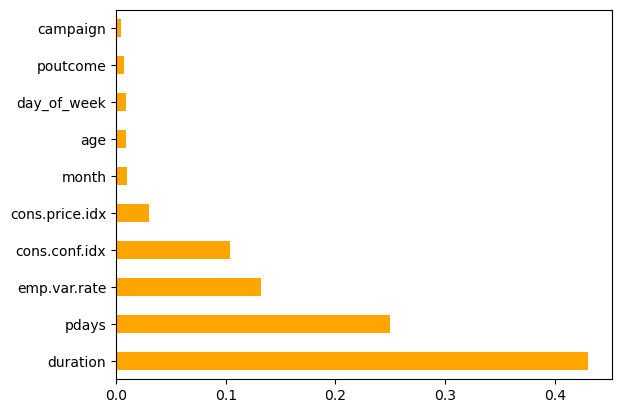

In [45]:
feat_importances = pd.Series(DTC.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='orange')
feat_importances.sort_values(ascending=False, inplace=True)
plt.show()

## Random Forest

* **n_estimators:** The number of decision trees in the forest. Increasing the number of trees can improve model performance, but it may also increase computation time.
* **max_features:** The number of features to consider when looking for the best split.
* **max_depth:** The maximum depth of each decision tree. It controls the complexity of the individual trees. A deeper tree can capture more complex patterns, but it may lead to overfitting.
* **min_samples_split:** The minimum number of samples required to split an internal node. It controls the size of the split. A smaller value makes the tree more sensitive to noise.
* **min_samples_leaf:** The minimum number of samples required to be at a leaf node. It controls the minimum size of the leaf nodes. Larger values can help prevent overfitting.
* **bootstrap:** Whether or not to use bootstrap samples (randomly sampled with replacement) when building trees. Setting it to False can reduce the randomness in the model.

In [28]:
rfc = RandomForestClassifier()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)] 

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [1, 2, 5, 10, 15]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Method of selecting samples for training each tree
bootstrap = [True, False]


rfc_params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap }

In [29]:
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = rfc_params,
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

rfc_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=450; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=450; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=450; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=450; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=450; total time=   0.0s
[CV] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=10

[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=350; total time=   3.9s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=350; total time=   3.9s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=350; total time=   3.9s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=350; total time=   3.9s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=350; total time=   4.0s
[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   5.2s
[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   5.2s
[CV] END bootstrap=True, max_depth=25, max_fea

[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=150; total time=   2.3s
[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=150; total time=   2.3s
[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=150; total time=   2.3s
[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=150; total time=   2.3s
[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=150; total time=   2.3s
[CV] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=250; total time=   0.0s
[CV] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=250; total time=   0.0s
[CV] END bootstrap=True, max_depth=2

[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   2.6s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   2.6s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   2.6s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   2.6s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   2.6s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_featur

[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=500; total time=   5.3s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=500; total time=   5.3s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=500; total time=   5.4s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=500; total time=   5.4s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=500; total time=   5.3s
[CV] END bootstrap=False, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   2.1s
[CV] END bootstrap=False, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   2.1s
[CV] END bootstrap=False, max_depth=5, max_

[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.6s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.6s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.7s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.7s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.6s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END bootstrap=False, max_depth=15, max_fe

[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=250; total time=   2.7s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=250; total time=   2.6s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=250; total time=   2.7s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=250; total time=   2.6s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=250; total time=   2.6s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   4.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   4.2s
[CV] END bootstrap=True, max_depth=20, max_

[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, max_depth=3

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [1, 2, 5, 10, 15],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   random_state=42, verbose=2)

In [30]:
print(rfc_random.best_params_)
print('score: {}' .format(rfc_random.best_score_))

{'n_estimators': 450, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 25, 'bootstrap': True}
score: 0.9145382146558816


* Best Parameteres:
    * n_estimators: 450
    * min_samples_split: 15
    * min_samples_leaf: 5
    * max_features: sqrt
    * max_depth: 25
    * bootstrap': True
* **Accuracy: 91.45%**

In [52]:
rfc = RandomForestClassifier(n_estimators=450, min_samples_split=15, 
                           min_samples_leaf=5, max_features='sqrt', 
                           max_depth=25 )

rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

rfc_Score = cross_val_score(rfc,X_test,y_test,cv=10)
print('Cross Val Score: ', rfc_Score.mean())

rfc_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rfc_RMSE)

Cross Val Score:  0.9129852717786144
Root Mean Squared Error: 0.29000373390583106


In [53]:
rfc_conf_matrix = confusion_matrix(y_test, y_pred)
rfc_conf_matrix

array([[8838,  294],
       [ 572,  593]])

In [54]:
rfc_accuracy = (rfc_conf_matrix[1,1] + rfc_conf_matrix[0,0]) / (rfc_conf_matrix[1,1] + rfc_conf_matrix[0,0] + rfc_conf_matrix[0,1] + rfc_conf_matrix[1,0])
rfc_precision = rfc_conf_matrix[1,1] / (rfc_conf_matrix[1,1] + rfc_conf_matrix[0,1])
rfc_recall = rfc_conf_matrix[1,1] / (rfc_conf_matrix[1,1] + rfc_conf_matrix[1,0])
rfc_f1_score = 2 * (rfc_precision * rfc_recall) / (rfc_precision + rfc_recall)

print("Accuracy: {:.1f}".format(rfc_accuracy*100))
print("Precision: {:.1f}".format(rfc_precision*100))
print("Recall: {:.1f}".format(rfc_recall*100))
print("F1 Score: {:.1f}".format(rfc_f1_score*100))

Accuracy: 91.6
Precision: 66.9
Recall: 50.9
F1 Score: 57.8


## XGBoost Classifier

* **n_estimators:** The number of boosting rounds (trees) to train. Increasing this value can improve performance but may lead to longer training times.
* **max_depth:** The maximum depth of the individual trees. A higher value allows the model to capture more complex patterns but can lead to overfitting.
* **learning_rate:** The step size shrinkage used in each boosting iteration to prevent overfitting. Smaller values require more iterations.
* **subsample:** The fraction of samples used for training each tree. Setting it to a value less than 1.0 can prevent overfitting.
* **colsample_bytree:** The fraction of features used for training each tree. Similar to subsample, this can prevent overfitting by limiting the features considered.

In [31]:
xgbc = xgb.XGBClassifier()

xgb_param = {
    'n_estimators': [100, 200, 300, 500, 750, 1000],
    'max_depth': [3, 4, 5, 8, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.075, 0.1, 0.2],
    'subsample': [0.5, 0.6, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.8, 0.9, 1.0]
}

In [32]:
xgb_random = RandomizedSearchCV(estimator = xgbc, param_distributions = xgb_param,
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)
xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END colsample_bytree=0.8, learning_rate=0.075, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.075, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.075, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.075, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.075, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.6; total time=   1.0s
[

[CV] END colsample_bytree=0.6, learning_rate=0.075, max_depth=10, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.075, max_depth=10, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.075, max_depth=10, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.075, max_depth=10, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.075, max_depth=10, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=750, subsample=0.6; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=750, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=750, subsample=0.6; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_dept

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.6; total time=   1.4s
[CV] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.6; total time=   1.3s
[CV] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.6; total time=   1.4s
[CV] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.6; total time=   1.3s
[CV] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=1000, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=1000, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=1000, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=4, n_estima

[CV] END colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=500, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=500, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=500, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=500, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=500, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=4, n_estimators=1000, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=4, n_es

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=4, n_estimators=750, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=4, n_estimators=750, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=4, n_estimators=750, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=4, n_estimators=750, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=4, n_estimators=750, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=3, n_estima

[CV] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estim

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=500, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=500, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=500, subsample=0.5; total time=   0.8s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=100, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.5, 0.6, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.03, 0.05,
                                                          0.075, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 8, 10],
                                        'n_estimators': [100, 200, 300, 500,
                                                         750, 1000],
                                        'subsample': [0.5, 0.6, 0.8, 0.9, 1.0]},
                   random_state=42, verbose=2)

In [33]:
print(xgb_random.best_params_)
print('score: {}' .format(xgb_random.best_score_))

{'subsample': 0.6, 'n_estimators': 1000, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
score: 0.9154768988267417


* Best Parameters
    * subsample: 1.0 
    * n_estimators: 500 
    * max_depth: 4 
    * learning_rate: 0.03 
    * colsample_bytree: 0.5
* **Accuracy: 91.61%**

In [55]:
xgbc = xgb.XGBClassifier(subsample=0.6, n_estimators=1000, 
                           learning_rate=0.01, colsample_bytree=1, 
                           max_depth=4)

xgbc.fit(X_train,y_train)
y_pred = xgbc.predict(X_test)

xgbc_Score = cross_val_score(xgbc,X_test,y_test,cv=10)
print('Cross Val Score: ', xgbc_Score.mean())

xgbc_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', xgbc_RMSE)

Cross Val Score:  0.9156068197043034
Root Mean Squared Error: 0.28680475597337346


In [56]:
xgbc_conf_matrix = confusion_matrix(y_test, y_pred)
xgbc_conf_matrix

array([[8833,  299],
       [ 548,  617]])

In [57]:
xgbc_accuracy = (xgbc_conf_matrix[1,1] + xgbc_conf_matrix[0,0]) / (xgbc_conf_matrix[1,1] + xgbc_conf_matrix[0,0] + xgbc_conf_matrix[0,1] + xgbc_conf_matrix[1,0])
xgbc_precision = xgbc_conf_matrix[1,1] / (xgbc_conf_matrix[1,1] + xgbc_conf_matrix[0,1])
xgbc_recall = xgbc_conf_matrix[1,1] / (xgbc_conf_matrix[1,1] + xgbc_conf_matrix[1,0])
xgbc_f1_score = 2 * (xgbc_precision * xgbc_recall) / (xgbc_precision + xgbc_recall)

print("Accuracy: {:.1f}".format(xgbc_accuracy*100))
print("Precision: {:.1f}".format(xgbc_precision*100))
print("Recall: {:.1f}".format(xgbc_recall*100))
print("F1 Score: {:.1f}".format(xgbc_f1_score*100))

Accuracy: 91.8
Precision: 67.4
Recall: 53.0
F1 Score: 59.3


### Comparing Results of different models

In [142]:
print("Logistic Regression: Accuracy= {:.1f}, Recall= {:.1f}".format(lr_accuracy*100, lr_recall*100))
print("K Nearest Neighbours: Accuracy= {:.1f}, Recall= {:.1f}".format(knn_accuracy*100, knn_recall*100))
print("SVM Classifier: Accuracy= {:.1f}, Recall= {:.1f}".format(svc_accuracy*100, svc_recall*100))
print("Naive Bayes: Accuracy= {:.1f}, Recall= {:.1f}".format(nb_accuracy*100, nb_recall*100))
print("Decision Tree Classifier: Accuracy= {:.1f}, Recall= {:.1f}".format(DTC_accuracy*100, DTC_recall*100))
print("Random Forest Classifier: Accuracy= {:.1f}, Recall= {:.1f}".format(rfc_accuracy*100, rfc_recall*100))
print("XGBoost Classifier: Accuracy= {:.1f}, Recall= {:.1f}".format(xgbc_accuracy*100, xgbc_recall*100))

Logistic Regression: Accuracy= 91.3, Recall= 43.6
K Nearest Neighbours: Accuracy= 89.8, Recall= 19.3
SVM Classifier: Accuracy= 90.0, Recall= 26.1
Naive Bayes: Accuracy= 88.7, Recall= 0.0
Decision Tree Classifier: Accuracy= 91.3, Recall= 48.4
Random Forest Classifier: Accuracy= 91.6, Recall= 50.9
XGBoost Classifier: Accuracy= 91.8, Recall= 53.0


# XGBoost Performs Best